<a href="https://colab.research.google.com/github/nash567/BostonCrime/blob/master/BostonCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
upload = files.upload()
!mkdir -p ~/.kaggle

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d AnalyzeBoston/crimes-in-boston

 77% 8.00M/10.4M [00:00<00:00, 80.1MB/s]
100% 10.4M/10.4M [00:00<00:00, 66.3MB/s]


In [0]:
ls

crimes-in-boston.zip  kaggle.json  sample_data/


In [0]:
!unzip crimes-in-boston.zip 

Archive:  crimes-in-boston.zip
  inflating: offense_codes.csv       
  inflating: crime.csv               


In [0]:
ls

crime.csv  crimes-in-boston.zip  kaggle.json  offense_codes.csv  sample_data/


In [0]:
import pandas as pd
df=pd.read_csv("crime.csv",encoding="latin-1")
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
import numpy as np

In [0]:
df.shape

(319073, 17)

In [0]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [0]:
# we can find the % of missing values

In [0]:
p=df.isnull().mean().round(4)*100
p


INCIDENT_NUMBER         0.00
OFFENSE_CODE            0.00
OFFENSE_CODE_GROUP      0.00
OFFENSE_DESCRIPTION     0.00
DISTRICT                0.55
REPORTING_AREA          0.00
SHOOTING               99.68
OCCURRED_ON_DATE        0.00
YEAR                    0.00
MONTH                   0.00
DAY_OF_WEEK             0.00
HOUR                    0.00
UCR_PART                0.03
STREET                  3.41
Lat                     6.27
Long                    6.27
Location                0.00
dtype: float64

# Second Method=[df.isnull().*sum*()/len(df)]*100 

In [0]:
len(df)

319073

In [0]:
df=df.drop("SHOOTING",axis=1)
p

INCIDENT_NUMBER         0.00
OFFENSE_CODE            0.00
OFFENSE_CODE_GROUP      0.00
OFFENSE_DESCRIPTION     0.00
DISTRICT                0.55
REPORTING_AREA          0.00
SHOOTING               99.68
OCCURRED_ON_DATE        0.00
YEAR                    0.00
MONTH                   0.00
DAY_OF_WEEK             0.00
HOUR                    0.00
UCR_PART                0.03
STREET                  3.41
Lat                     6.27
Long                    6.27
Location                0.00
dtype: float64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 16 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 38.9+ MB


In [0]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [0]:
df.dropna(subset=["DISTRICT","UCR_PART"],inplace=True)

In [0]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                  9824
Lat                    19715
Long                   19715
Location                   0
dtype: int64

In [0]:
p=df.corrwith(df.OFFENSE_CODE)

In [0]:
import seaborn as sns

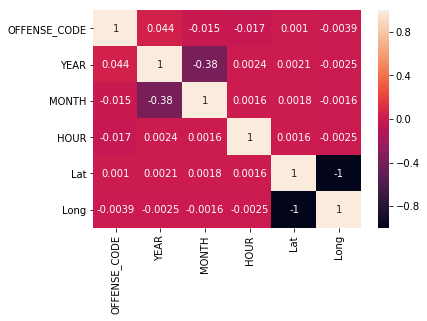

In [0]:
sns.heatmap(df.corr(),annot=True)

In [0]:
df.columns=[x.lower() for x in df.columns]

In [0]:
crime_most_common=df["offense_code_group"].value_counts()
crime_most_common=crime_most_common.to_frame()

In [0]:
crime_most_common.head()

,offense_code_group
Motor Vehicle Accident Response,36654
Larceny,25861
Medical Assistance,23475
Investigate Person,18677
Other,17992


In [0]:
crime_most_common.index[:5]

Index(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other'],
      dtype='object')

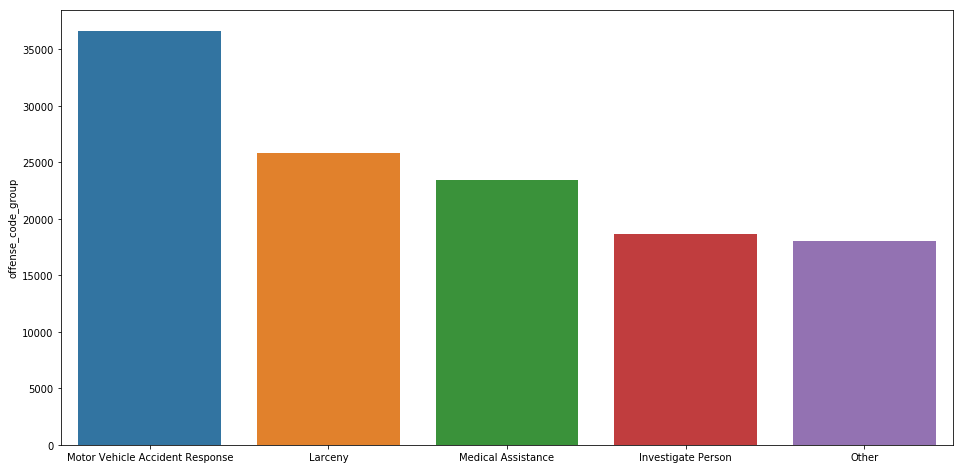

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.barplot(x=crime_most_common.index[:5],y="offense_code_group",data=crime_most_common.head(),orient="v")

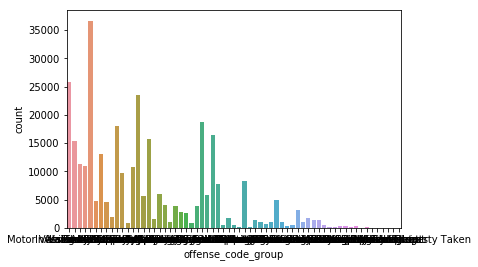

In [0]:
sns.countplot(x="offense_code_group",data=df,orient="V")

# ***DISTRIBUTION OF CRIME IN BOSTON IN WEEKS*** 

In [0]:
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'occurred_on_date',
       'year', 'month', 'day_of_week', 'hour', 'ucr_part', 'street', 'lat',
       'long', 'location'],
      dtype='object')

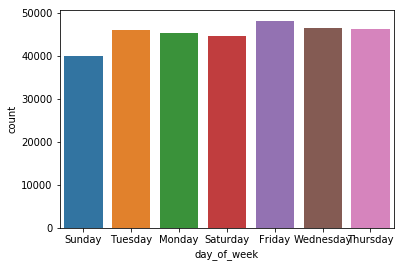

In [0]:
sns.countplot(x="day_of_week",data=df)

In [0]:
df.day_of_week.value_counts()

Friday       48186
Wednesday    46498
Thursday     46373
Tuesday      46106
Monday       45404
Saturday     44572
Sunday       40079
Name: day_of_week, dtype: int64

# **crime commited in 24 hour**

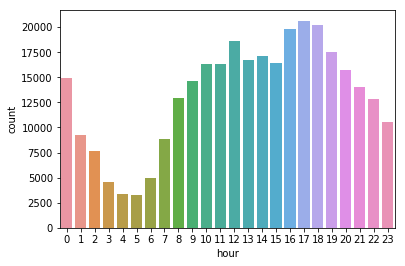

In [0]:
sns.countplot(x="hour",data=df)

# Visualization of Motor Vehicle Accident Response across all the districts in Boston

In [0]:
df["offense_code_group"].value_counts().head()

Motor Vehicle Accident Response    36654
Larceny                            25861
Medical Assistance                 23475
Investigate Person                 18677
Other                              17992
Name: offense_code_group, dtype: int64

In [0]:
crime_motor=df[df["offense_code_group"]=="Motor Vehicle Accident Response"]

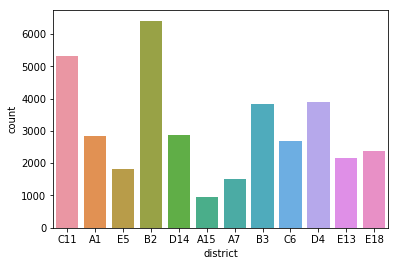

In [0]:
sns.countplot(x="district",data=crime_motor)

# **Function to calculate the type of crime across the all the districts and the respective visualization in street time, month,day of week**

## **This function will tell us about the count of district **

In [0]:
def crime_specified(x):
  crime_specified=df[df["offense_code_group"]==x]
  plt.figure(figsize=(16,8))
  sns.countplot(x="district",data=crime_specified)
  plt.title("Frequency of "+str(x)+" "+"response across the districts:", fontsize=15)
             
  return crime_specified             


In [0]:
df["offense_code_group"].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Assembly or Gathering Violations', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Residential Burglary', 'Simple Assault',
       'Restraining Order Violations', 'Violations', 'Harassment',
       'Ballistics', 'Property Found', 'Police Service Incidents',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Drug Violation', 'Aggravated Assault',
       'License Plate Related Incidents', 'Firearm Violations',
       'Other Burglary', 'Arson', 'Warrant Arrests', 'Bomb Hoax',
       'Counterfeiting', 'Liquor Violation', 'Firearm Discovery',
       'Landlord/Tenant Disputes', 'Missing Person Located',
       'Auto Theft Recovery', 'Service', 'Operating Under the Influence',
       'Confiden

## frequency of a particular crime in each district





,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
42,I182070888,301,Robbery,ROBBERY - STREET,A1,76,2018-09-03 15:45:00,2018,9,Monday,15,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
130,I182070795,301,Robbery,ROBBERY - STREET,C11,362,2018-09-02 20:30:00,2018,9,Sunday,20,Part One,LYNDHURST ST,42.292906,-71.069558,"(42.29290563, -71.06955795)"
176,I182070741,301,Robbery,ROBBERY - STREET,D14,805,2018-09-03 03:26:00,2018,9,Monday,3,Part One,PORTSMOUTH ST,42.360533,-71.144263,"(42.36053257, -71.14426332)"
273,I182070621,361,Robbery,ROBBERY - OTHER,A7,23,2018-09-02 18:09:00,2018,9,Sunday,18,Part One,MARION ST,42.377256,-71.036674,"(42.37725644, -71.03667354)"
299,I182070598,311,Robbery,ROBBERY - COMMERCIAL,A15,60,2018-09-02 17:15:00,2018,9,Sunday,17,Part One,RUTHERFORD AVE,42.371673,-71.063264,"(42.37167264, -71.06326413)"
345,I182070549,301,Robbery,ROBBERY - STREET,B2,282,2018-09-02 07:00:00,2018,9,Sunday,7,Part One,WARREN ST,42.328234,-71.083290,"(42.32823419, -71.08328981)"
386,I182070501,361,Robbery,ROBBERY - OTHER,B2,177,2018-09-01 19:00:00,2018,9,Saturday,19,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
412,I182070472,301,Robbery,ROBBERY - STREET,A1,92,2018-09-02 03:27:00,2018,9,Sunday,3,Part One,COURT ST,42.359254,-71.059477,"(42.35925400, -71.05947700)"
527,I182070342,381,Robbery,ROBBERY - CAR JACKING,E18,490,2018-09-01 17:05:00,2018,9,Saturday,17,Part One,CUMMINS HWY,42.276453,-71.112980,"(42.27645319, -71.11297971)"


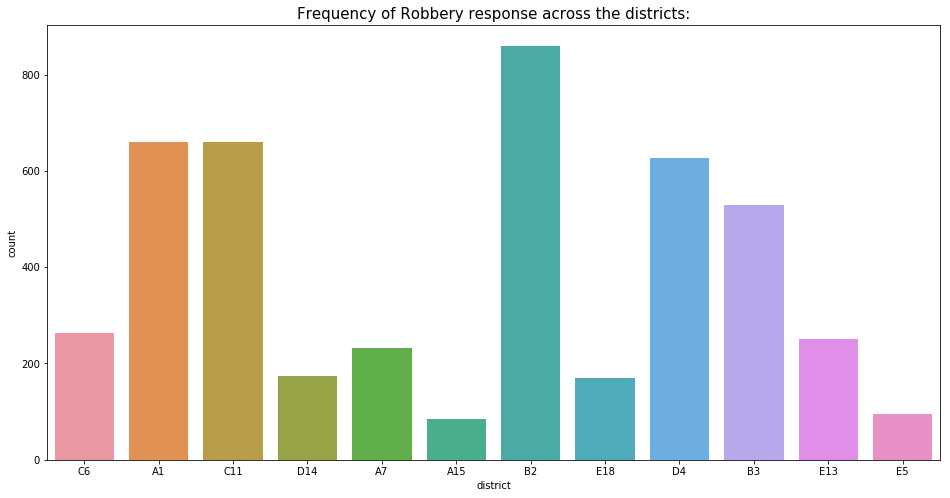

In [0]:
crime_specified("Robbery")

# NOw we will  find frequency of 

In [0]:
def street_wise_district(x):
  crime_district=df[df["district"]==x]
  
  plot_fig(crime_district,x,"offense_code_group")
  plot_fig(crime_district,x,"street")
  plot_time(crime_district,x,"day_of_week")
  plot_time(crime_district,x,"hour")
  plot_time(crime_district,x,"month")
  return crime_district


# This function will make plots for two things

1.   frequency of different crimes in a particular district

2.   in a particular district how the distribution of crime in different streets



In [0]:
def plot_fig(crime,string,y):
  x=crime[y].value_counts()
  x=x.to_frame()
  
  plt.figure(figsize=(16,6))
  sns.countplot(x=x.index[:5],data=x.head(),orient="V")
  
  plt.title("Frequency of top 5 crime committed in Boston in "+str(y)+" of "+str(string),fontsize=15)

# This function will plot the time at which crime is maximum in a particular district

In [0]:
def plot_time(crime_district,x,time):
    plt.figure(figsize=(16, 6))
    sns.countplot(x=time,data=crime_district)
    
    plt.title("Frequency of  crime committed in Boston in "+str(x)+" for "+str(time),fontsize=15)

### Now we want to give the function all the unique values of district

In [0]:
 p=df.district.unique()
  
  

In [0]:
p[1]

'C11'

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


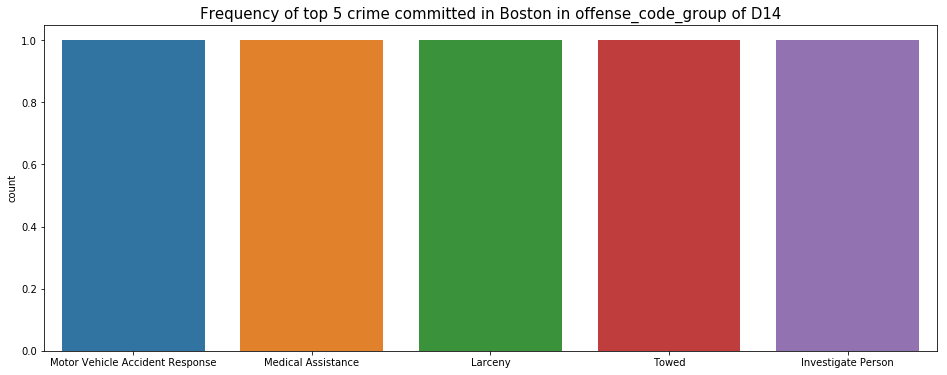

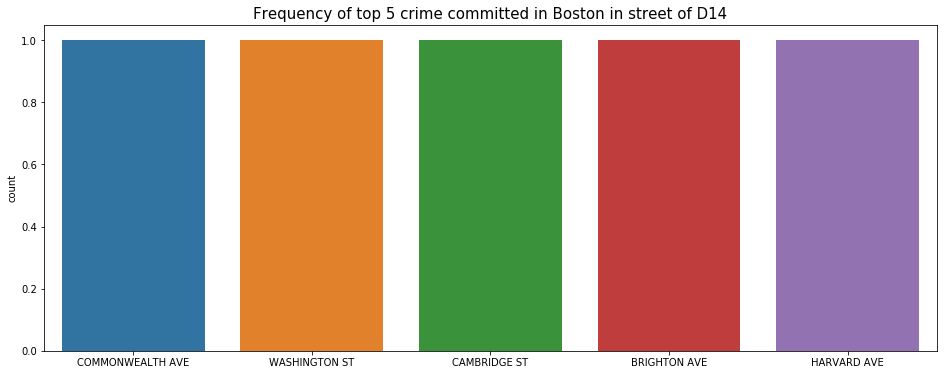

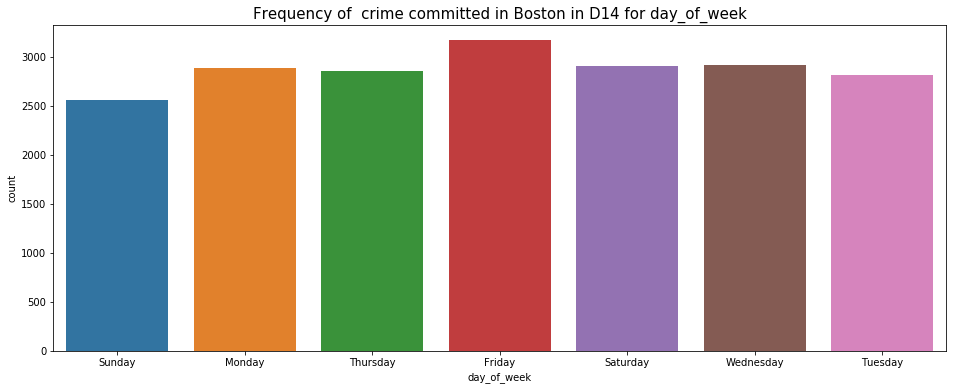

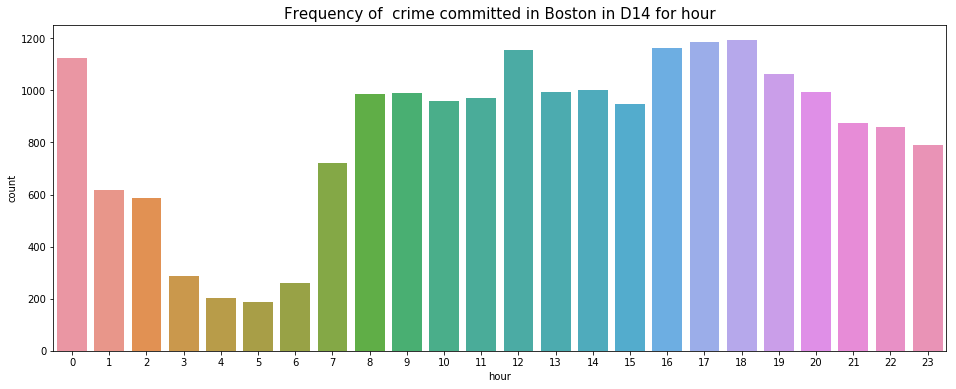

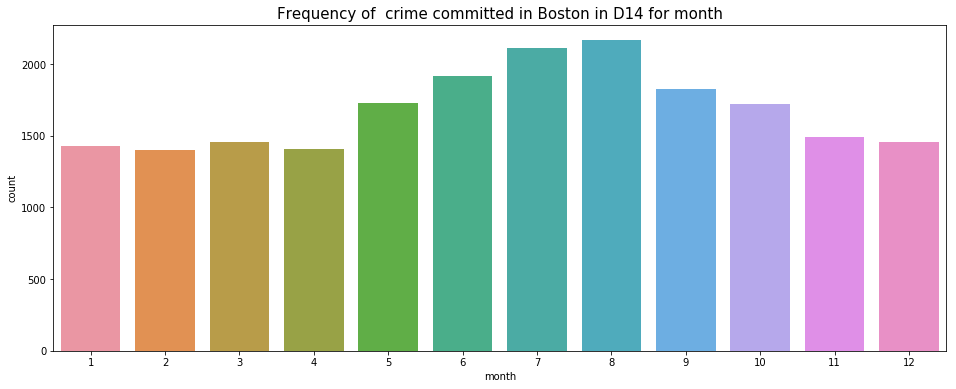

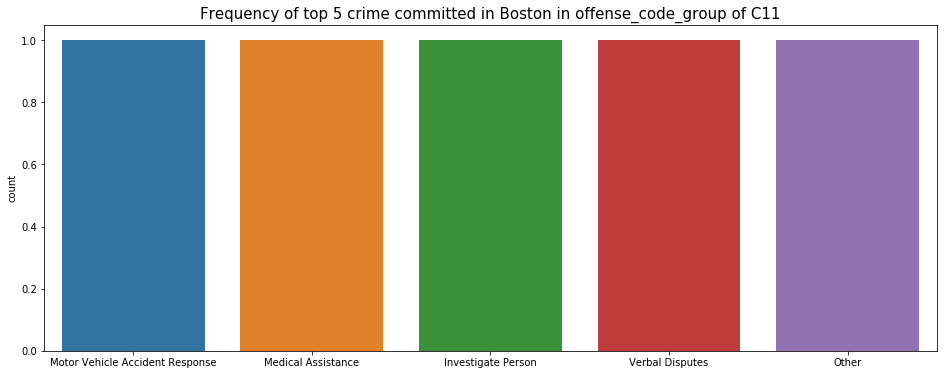

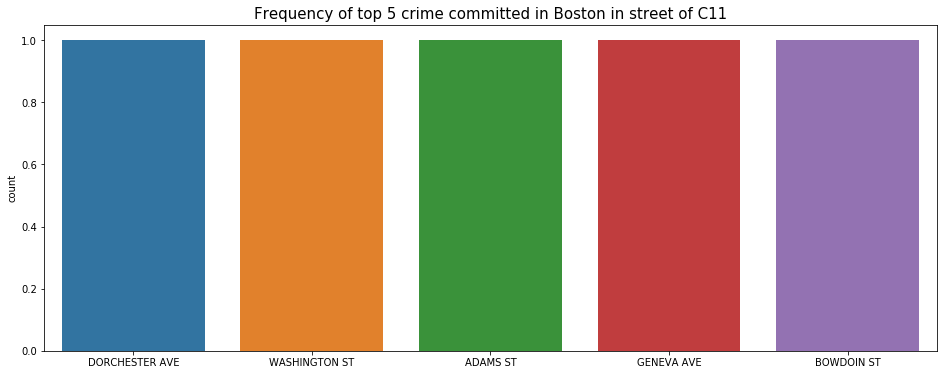

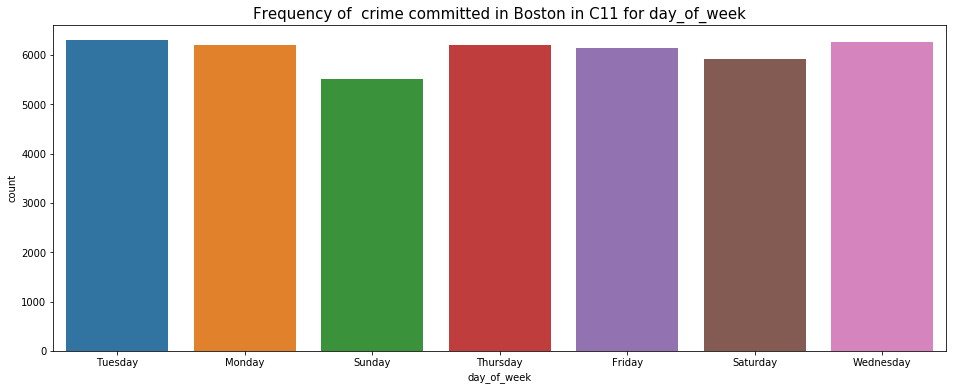

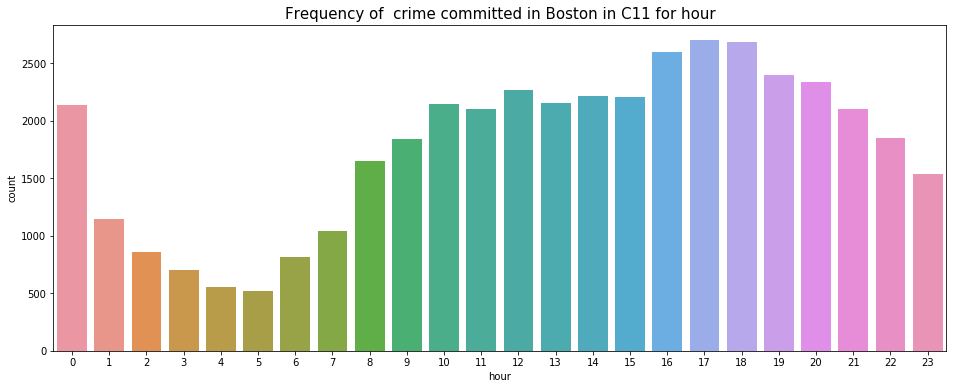

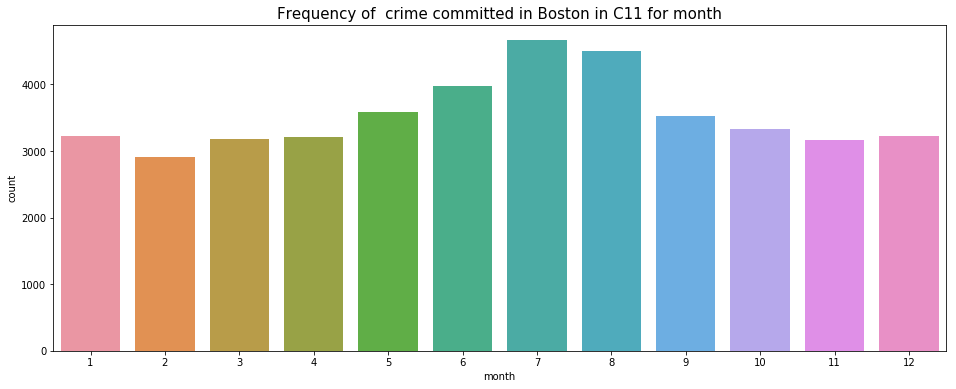

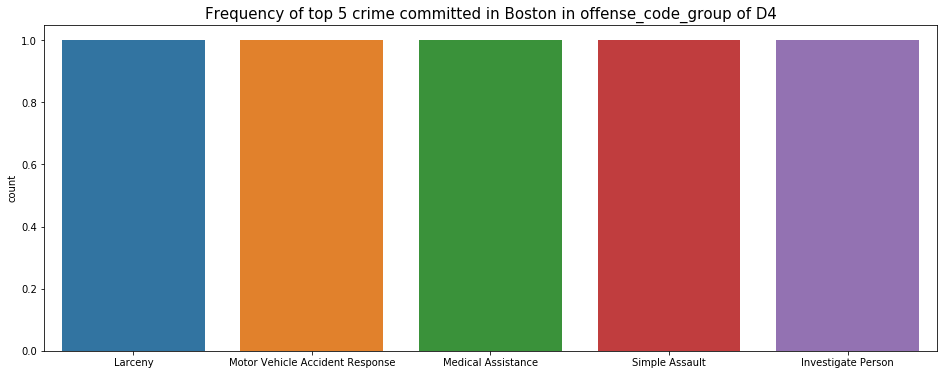

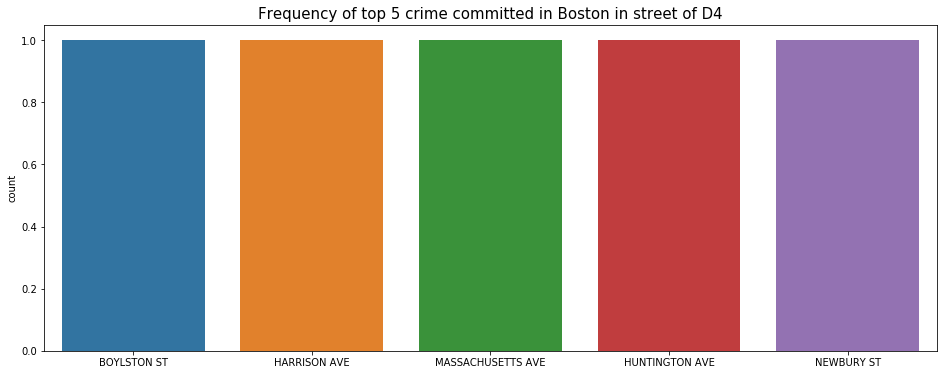

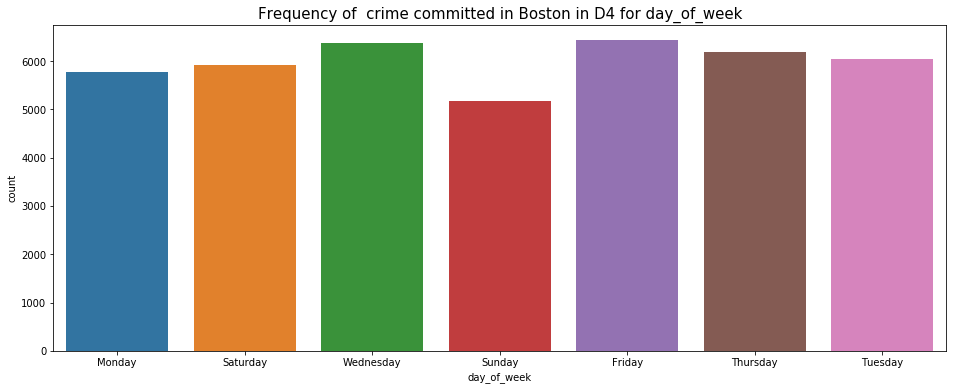

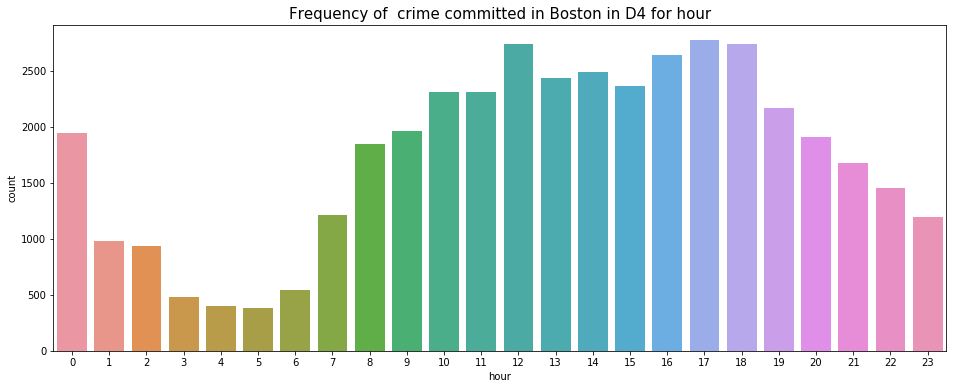

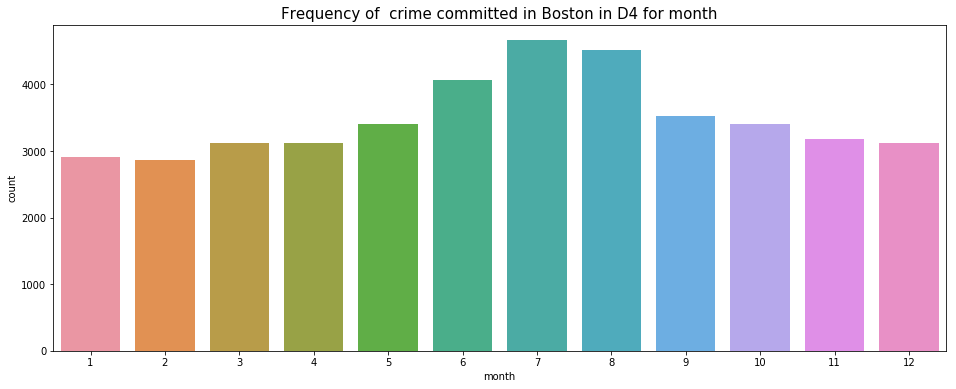

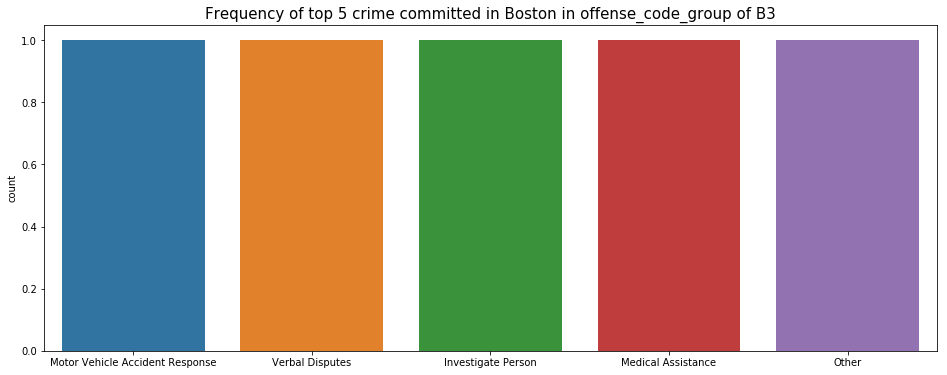

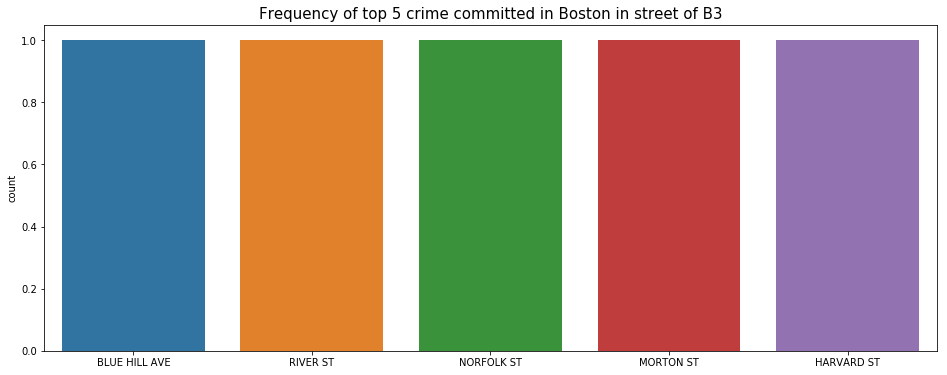

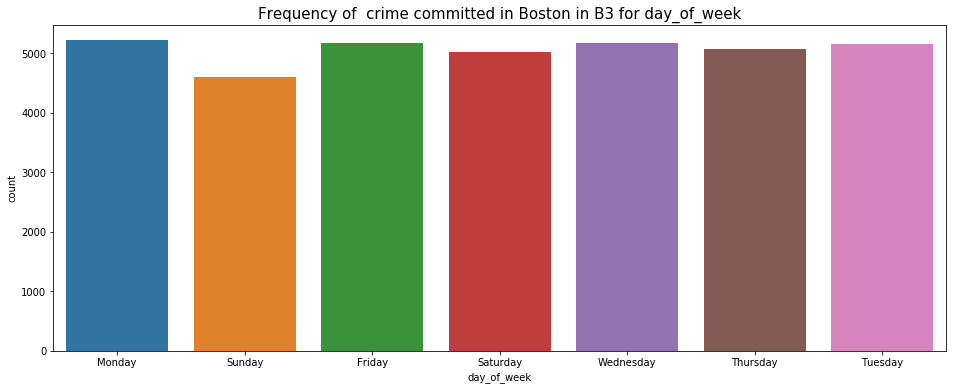

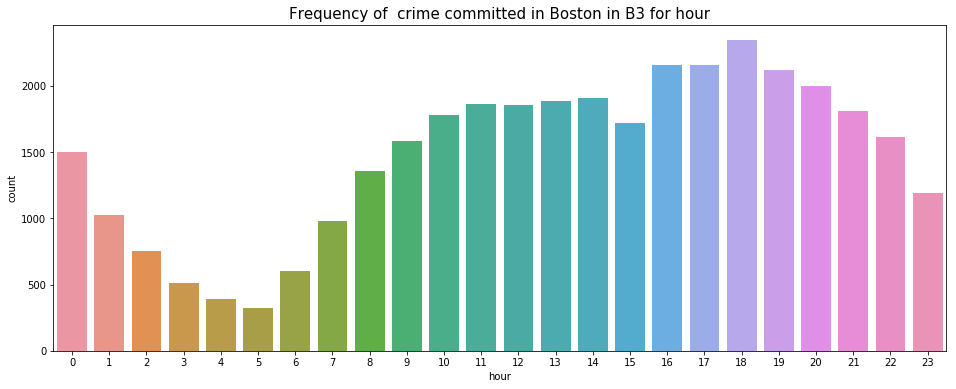

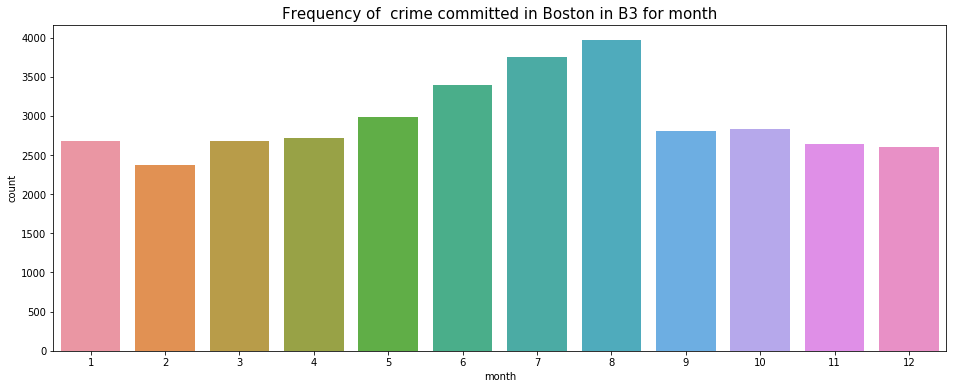

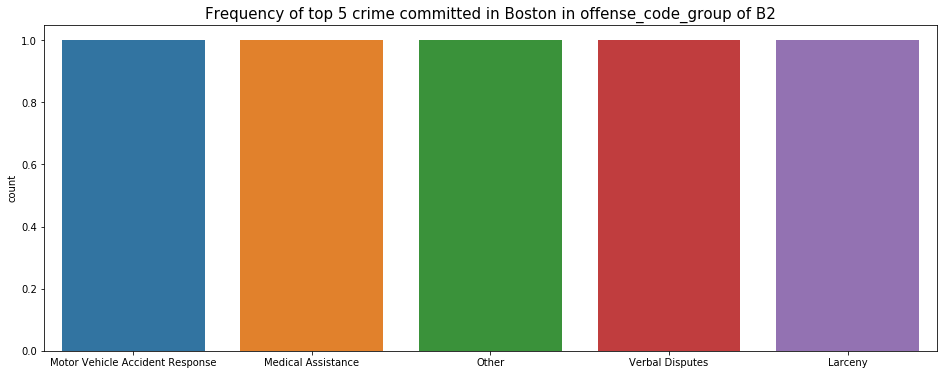

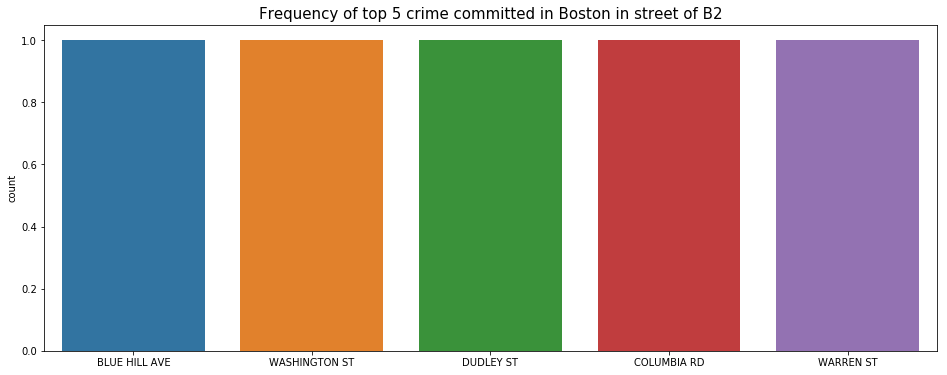

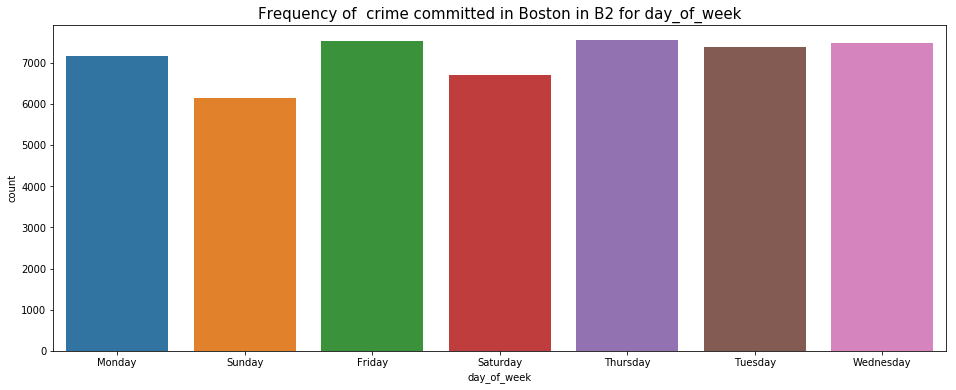

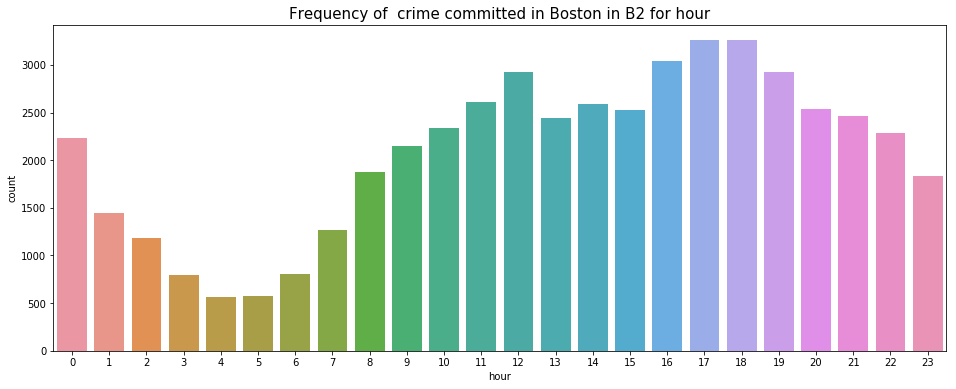

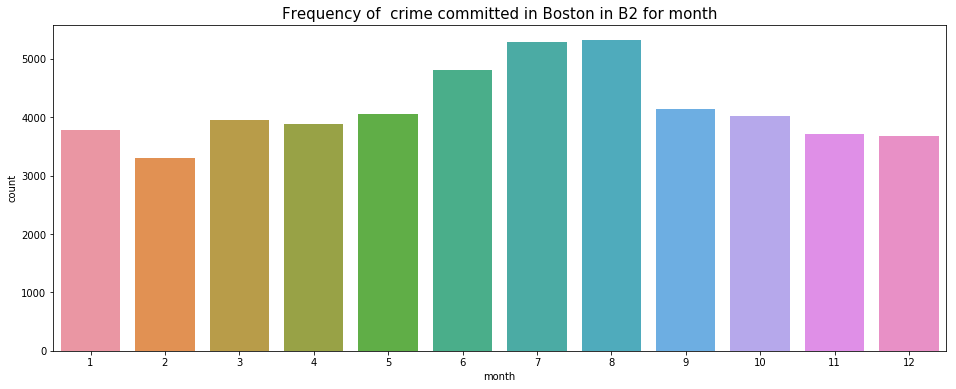

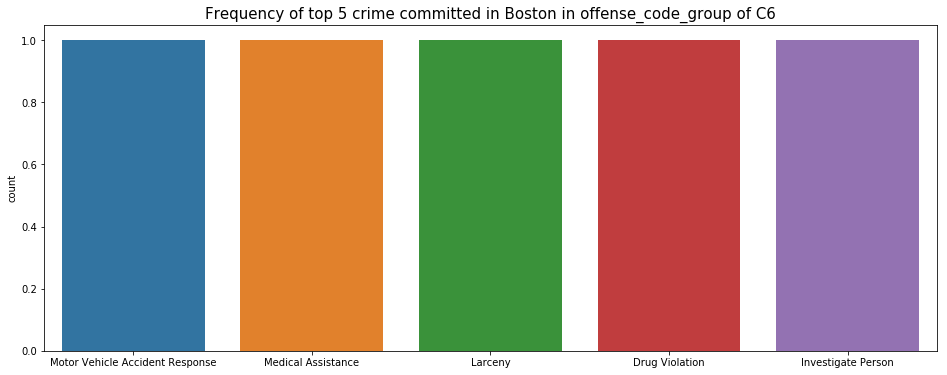

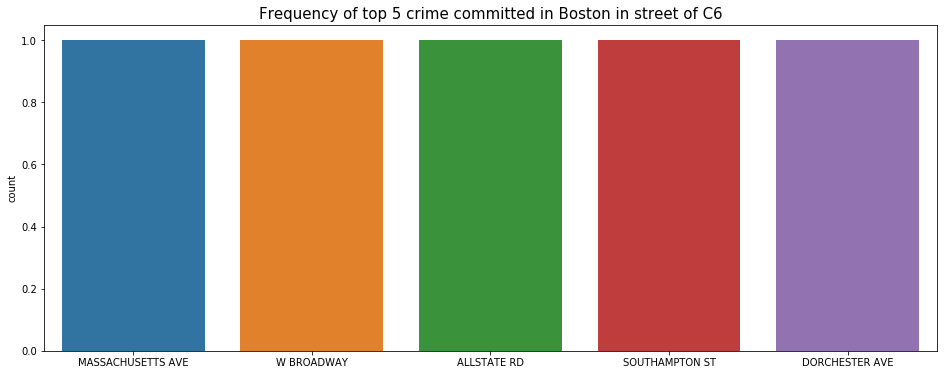

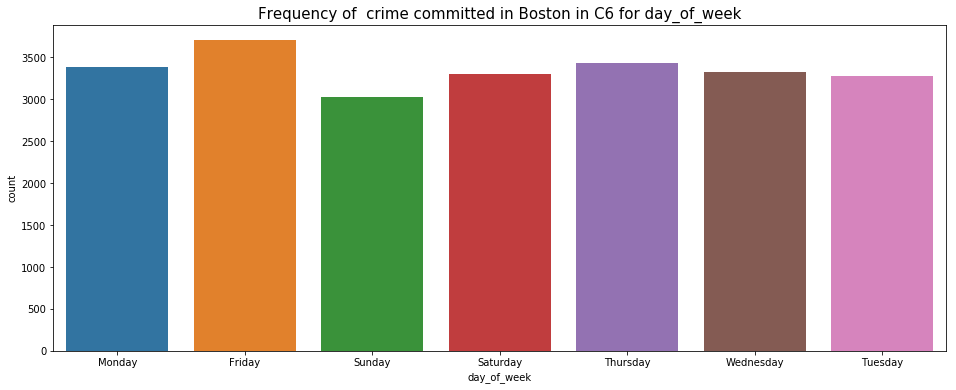

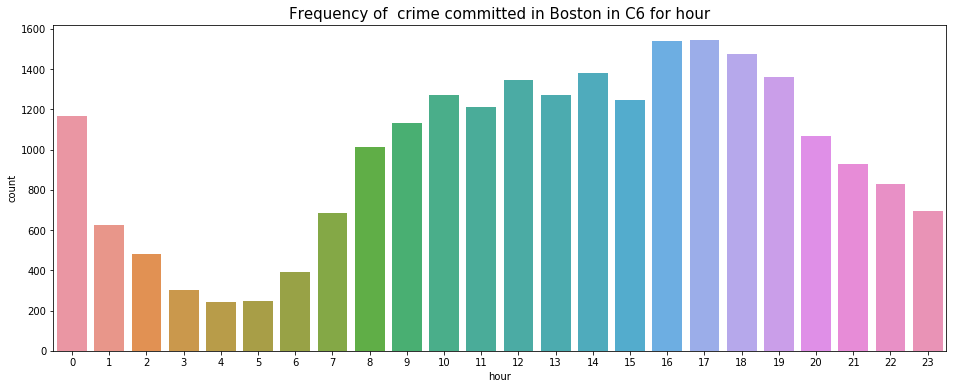

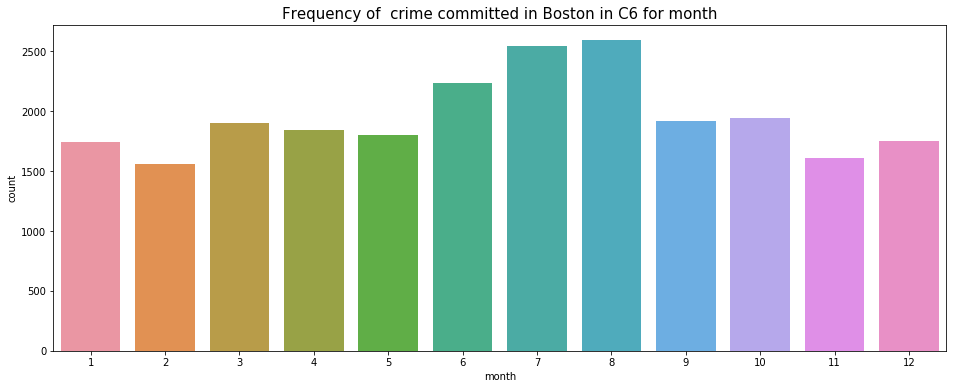

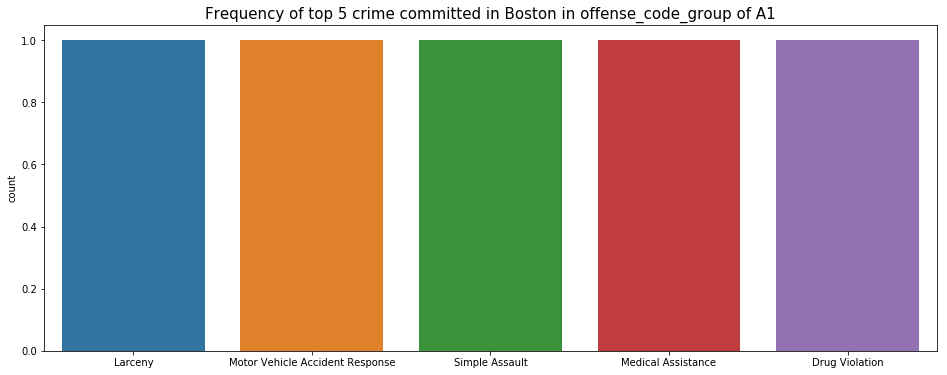

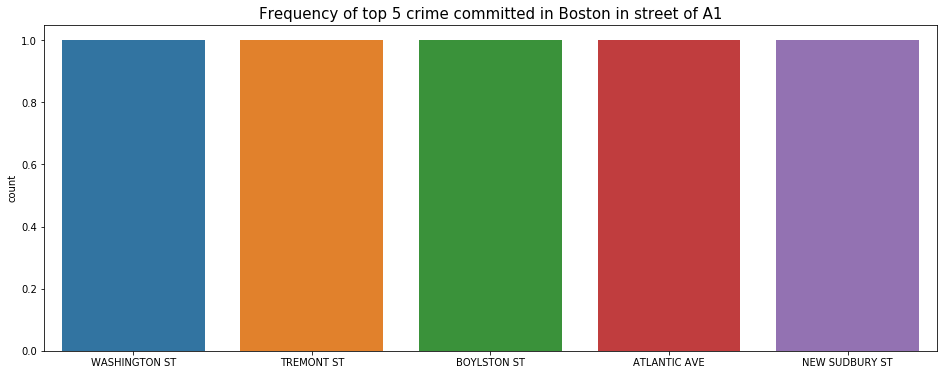

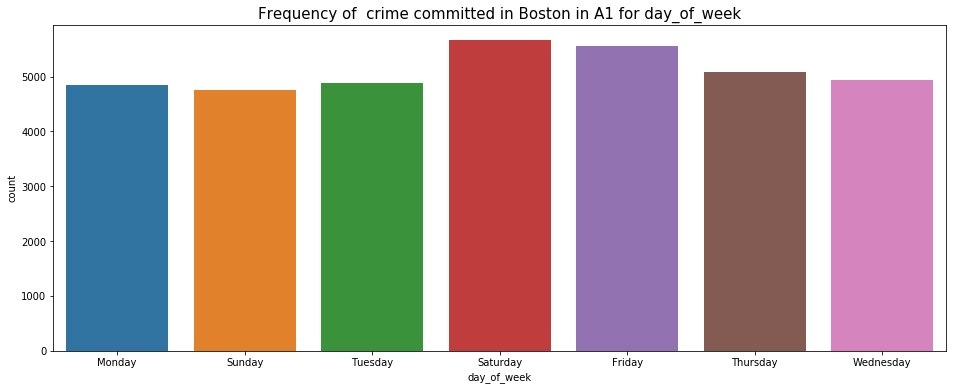

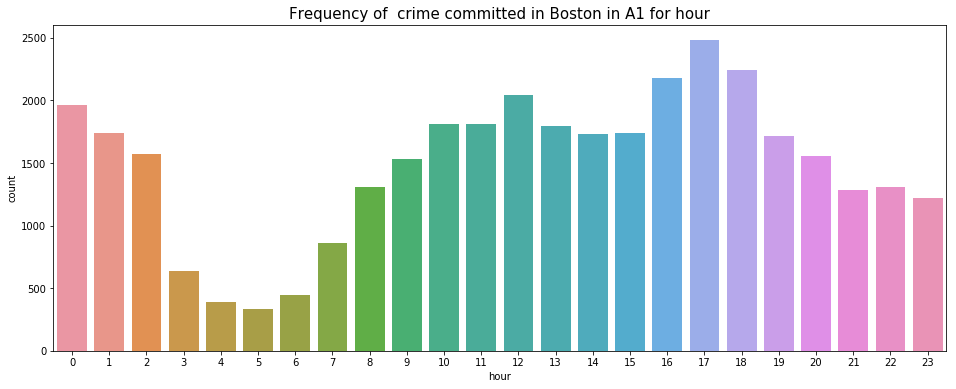

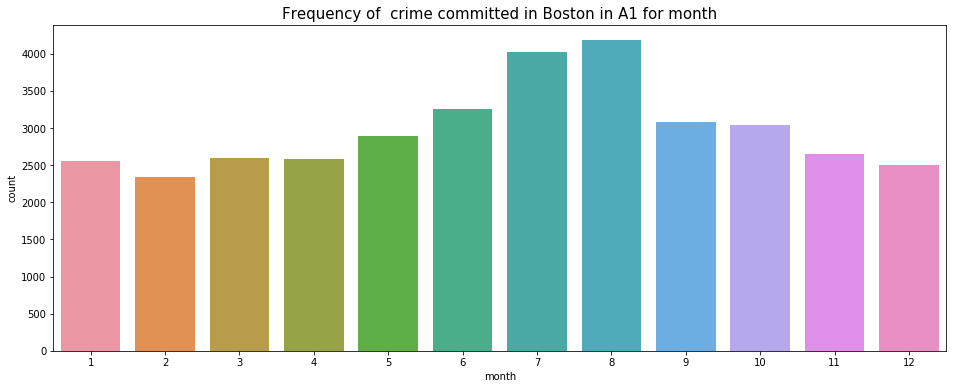

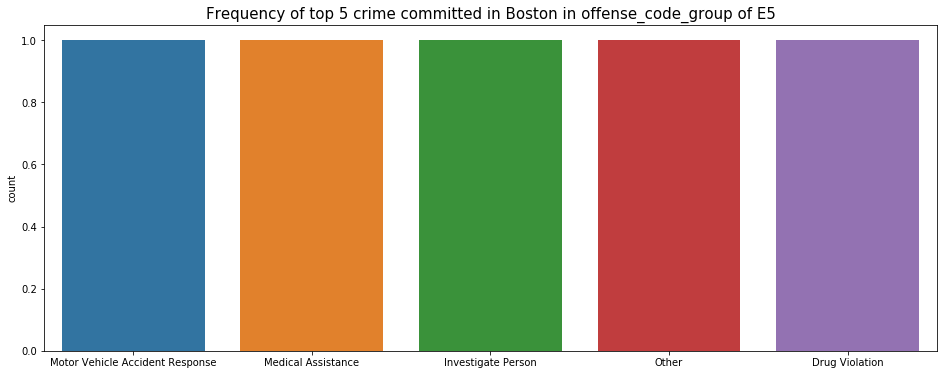

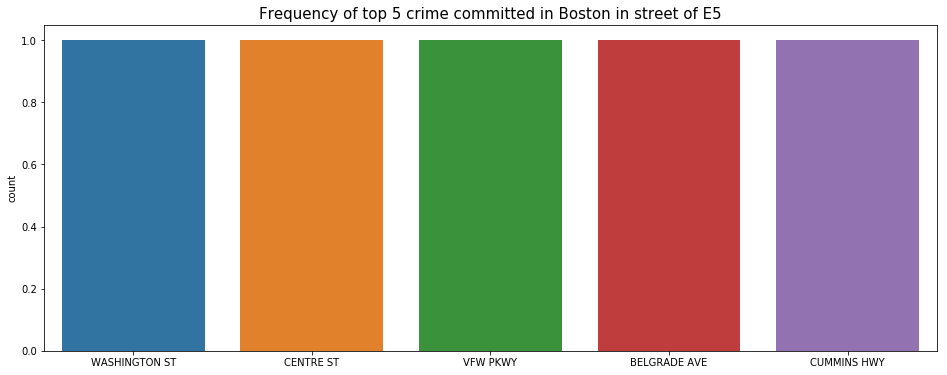

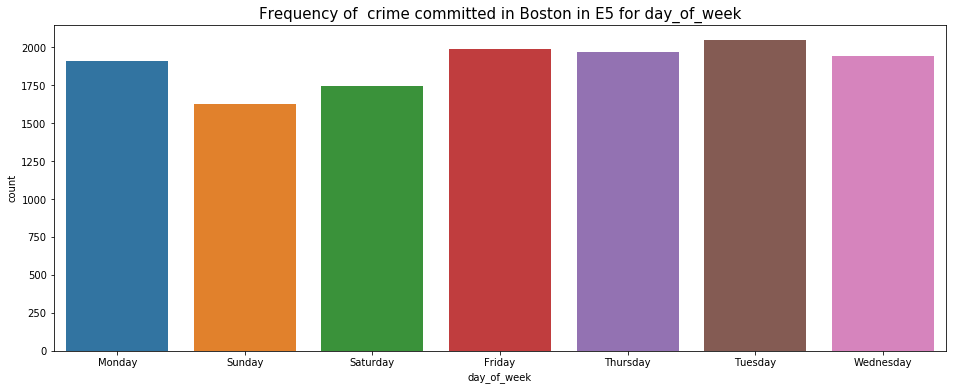

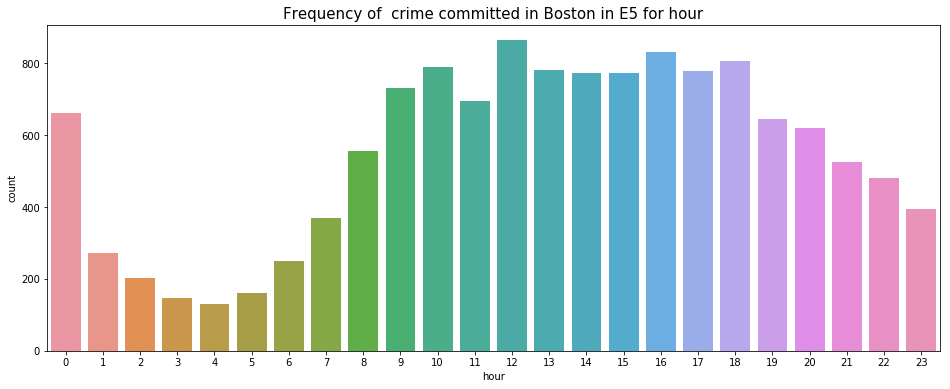

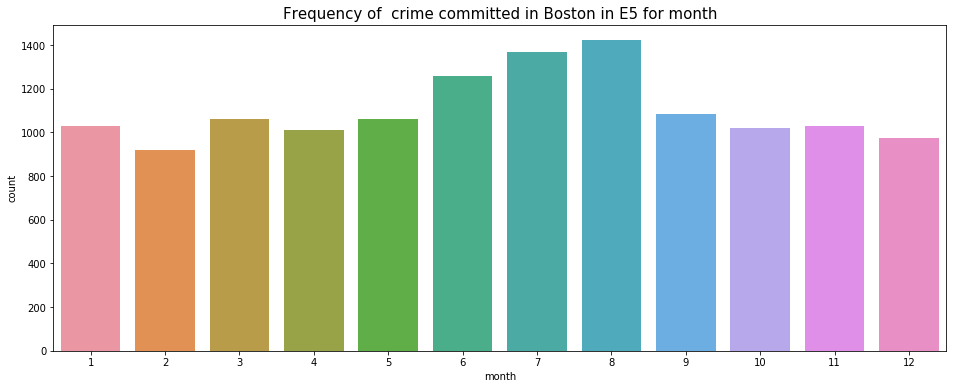

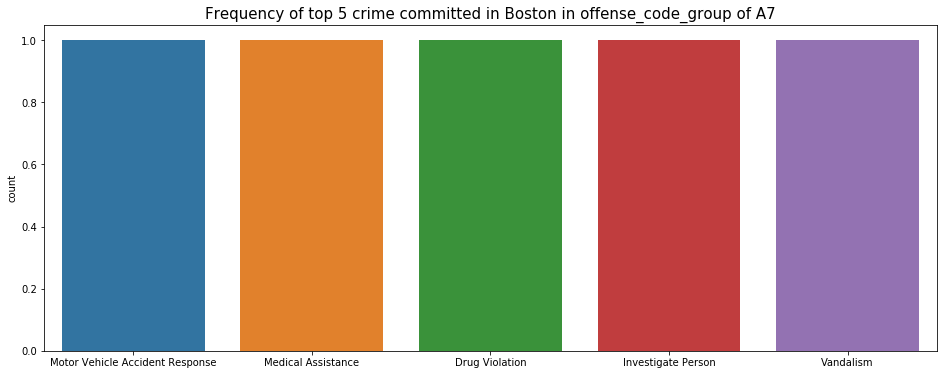

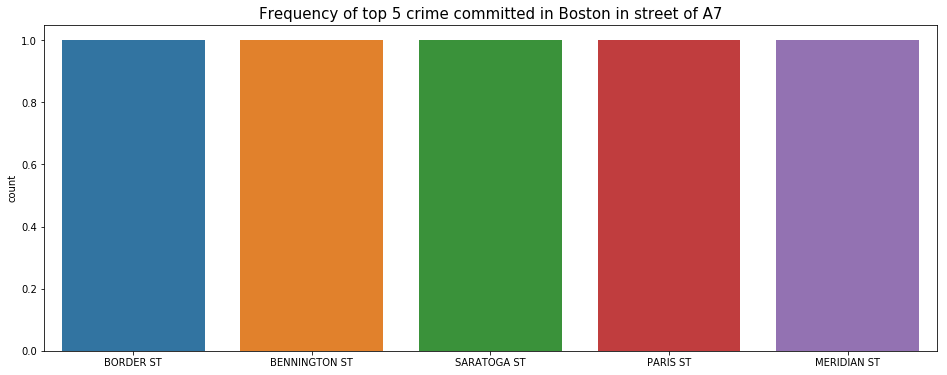

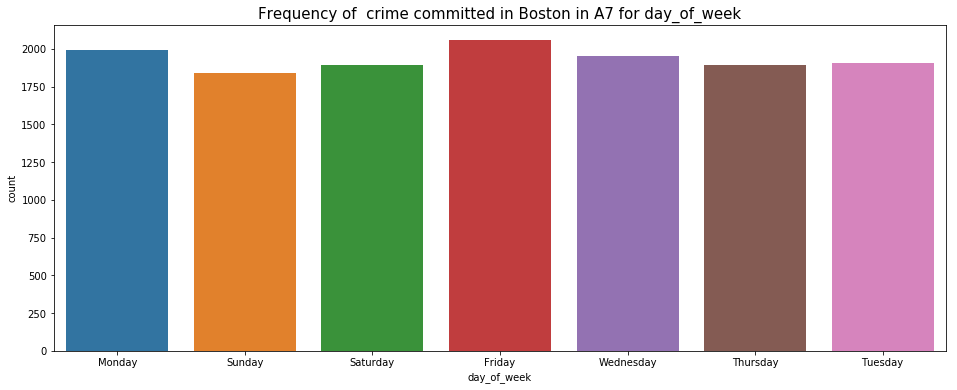

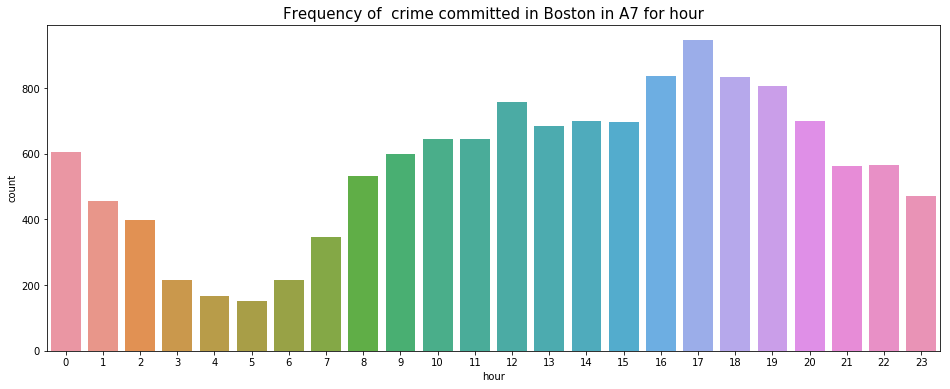

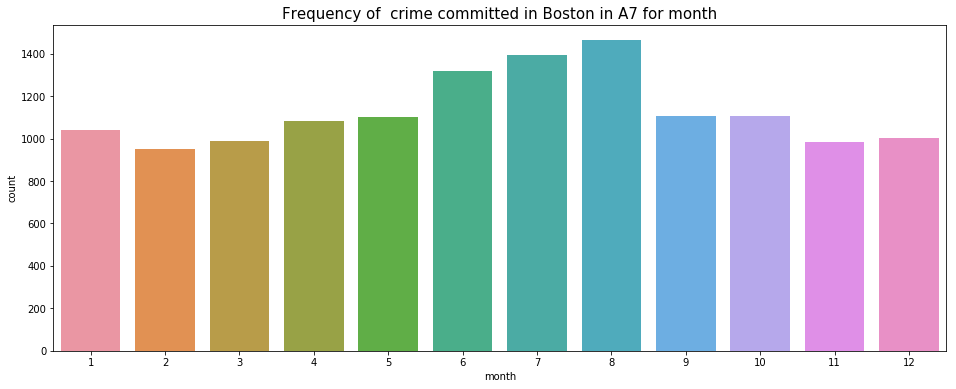

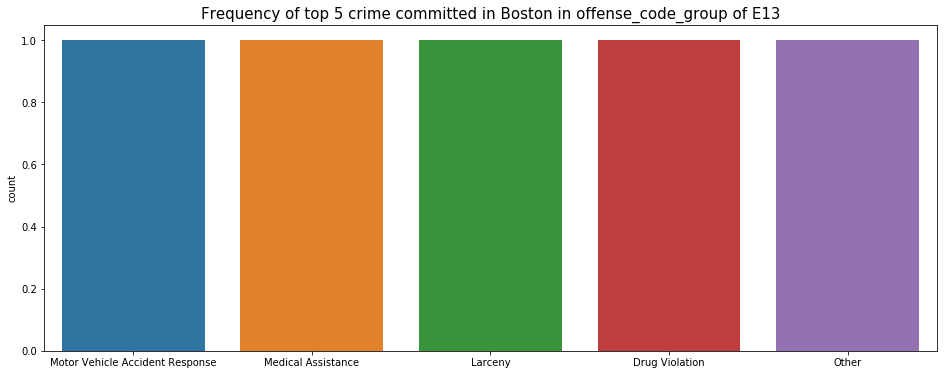

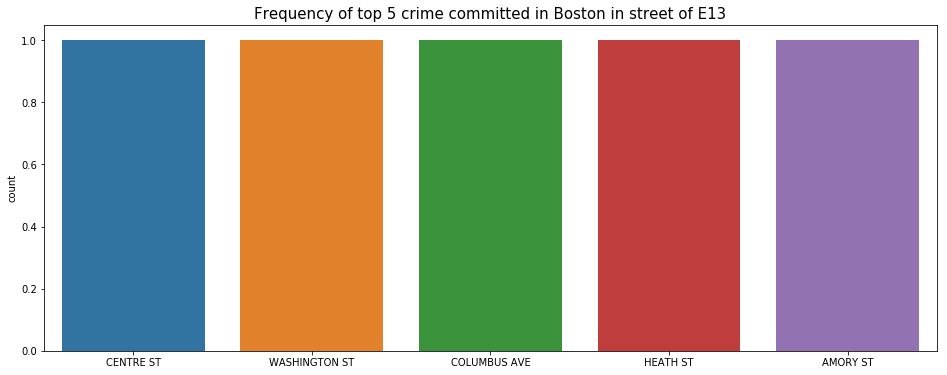

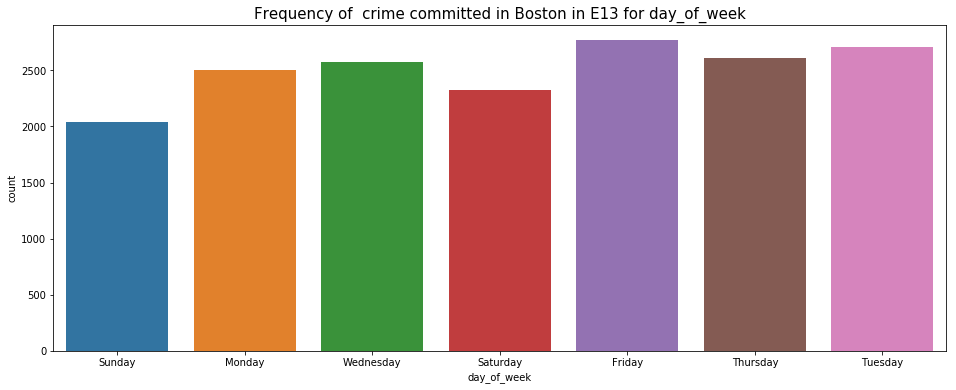

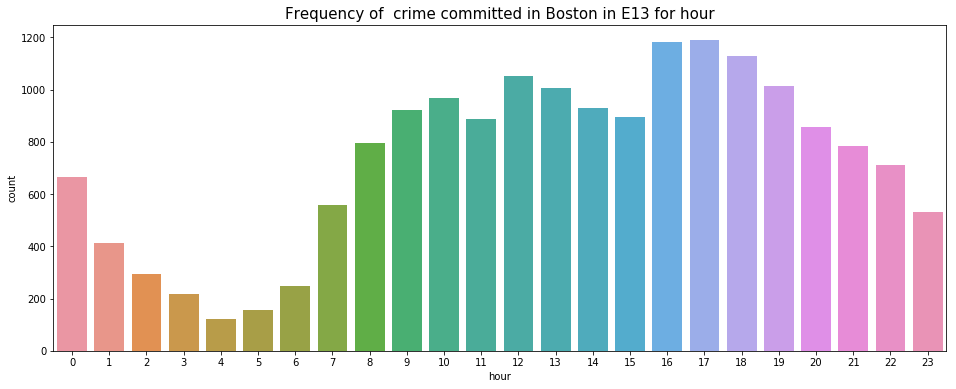

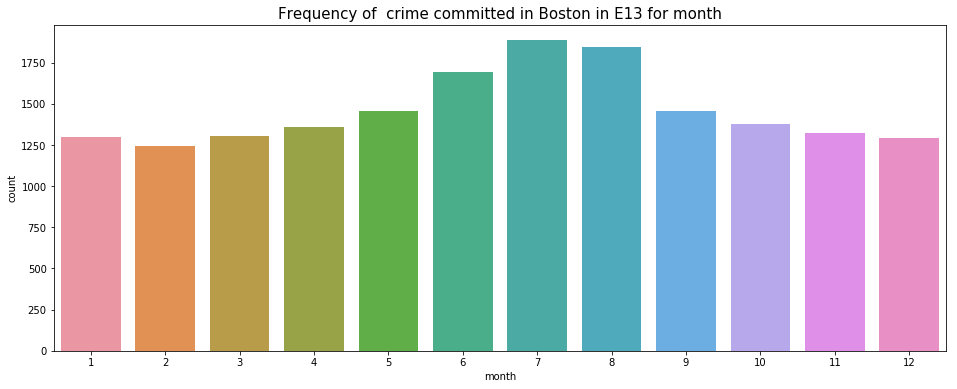

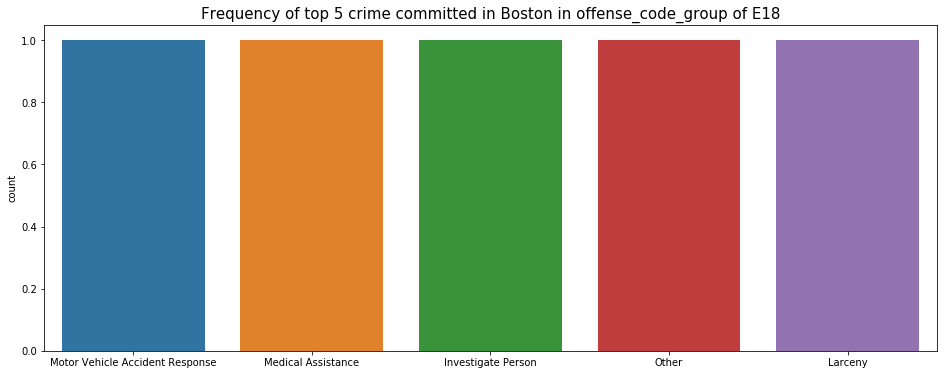

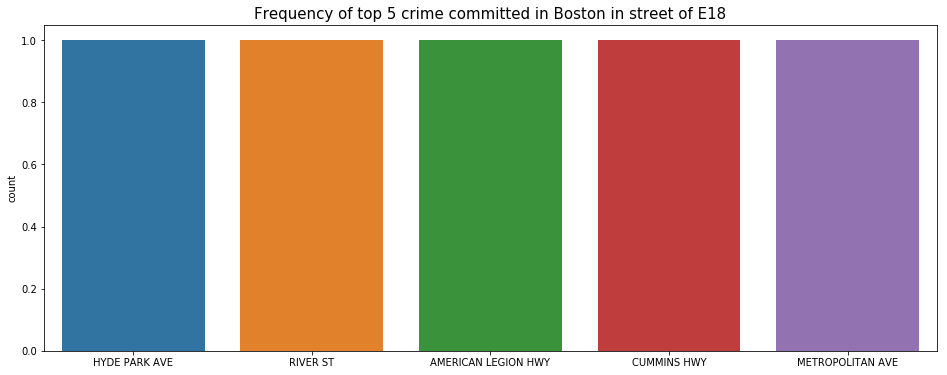

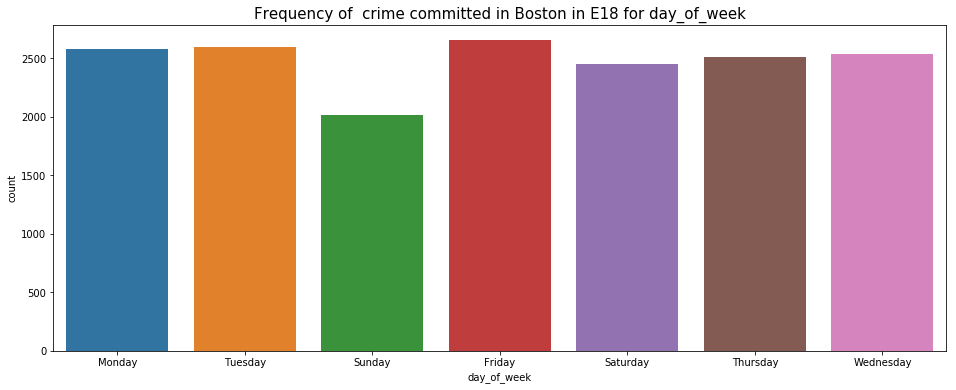

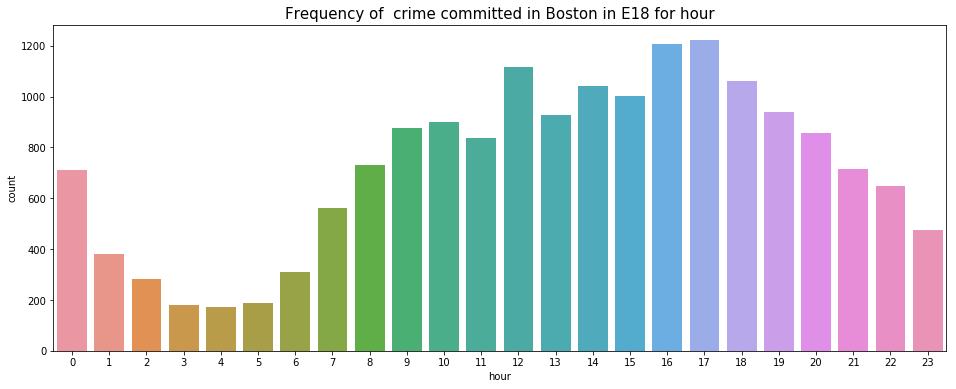

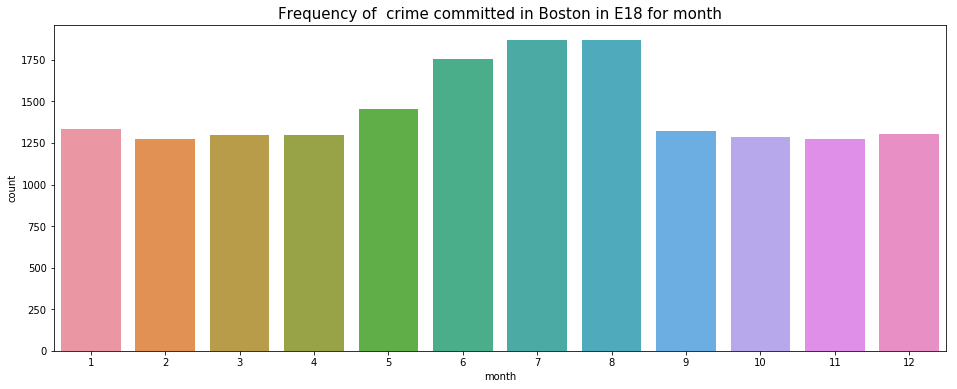

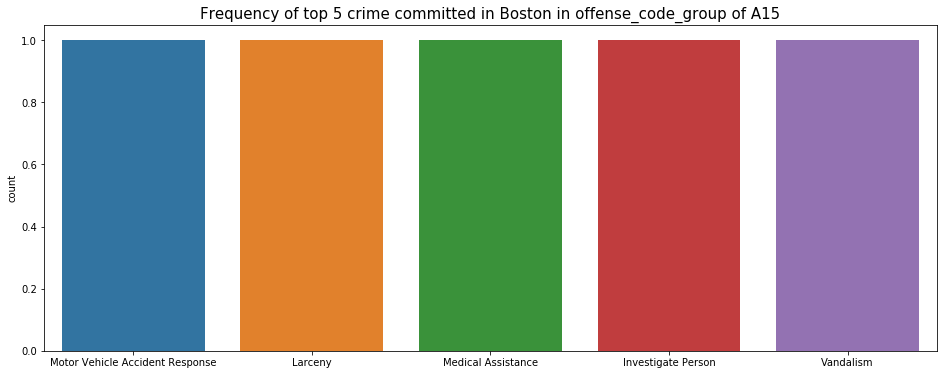

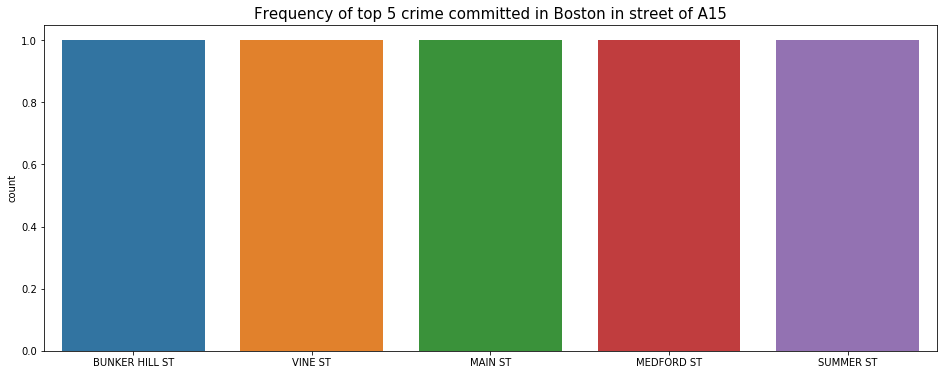

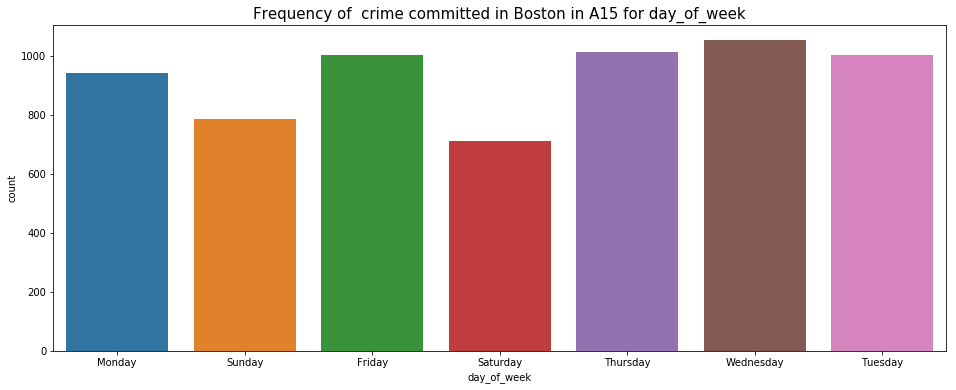

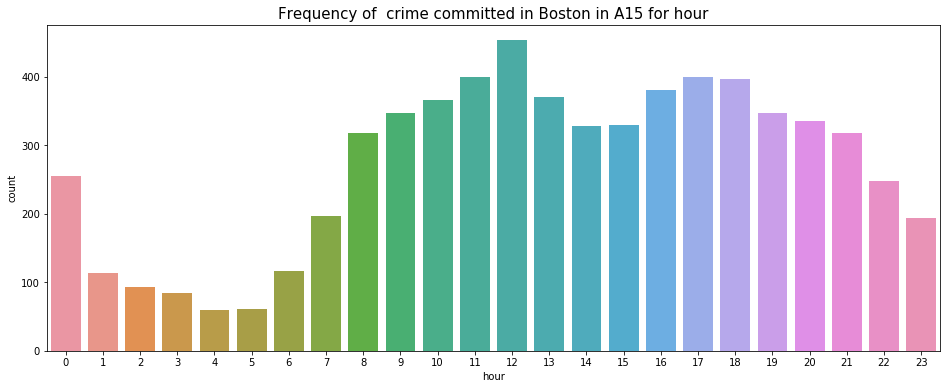

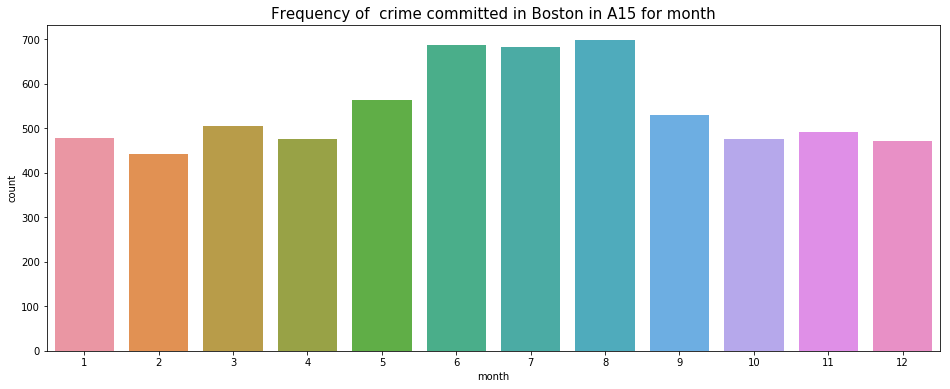

In [0]:
for i in range(len(p)):
  street_wise_district(p[i])